In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iwslt-en-vi-dataset/tst2012.vi
/kaggle/input/iwslt-en-vi-dataset/train.vi
/kaggle/input/iwslt-en-vi-dataset/tst2013.en
/kaggle/input/iwslt-en-vi-dataset/tst2013.vi
/kaggle/input/iwslt-en-vi-dataset/tst2012.en
/kaggle/input/iwslt-en-vi-dataset/train.en


In [2]:
!head -n 5 /kaggle/input/iwslt-en-vi-dataset/train.en

Rachel Pike : The science behind a climate headline
In 4 minutes , atmospheric chemist Rachel Pike provides a glimpse of the massive scientific effort behind the bold headlines on climate change , with her team -- one of thousands who contributed -- taking a risky flight over the rainforest in pursuit of data on a key molecule .
I &apos;d like to talk to you today about the scale of the scientific effort that goes into making the headlines you see in the paper .
Headlines that look like this when they have to do with climate change , and headlines that look like this when they have to do with air quality or smog .
They are both two branches of the same field of atmospheric science .


In [3]:
!head -n 5 /kaggle/input/iwslt-en-vi-dataset/train.vi

Khoa học đằng sau một tiêu đề về khí hậu
Trong 4 phút , chuyên gia hoá học khí quyển Rachel Pike giới thiệu sơ lược về những nỗ lực khoa học miệt mài đằng sau những tiêu đề táo bạo về biến đổi khí hậu , cùng với đoàn nghiên cứu của mình -- hàng ngàn người đã cống hiến cho dự án này -- một chuyến bay mạo hiểm qua rừng già để tìm kiếm thông tin về một phân tử then chốt .
Tôi muốn cho các bạn biết về sự to lớn của những nỗ lực khoa học đã góp phần làm nên các dòng tít bạn thường thấy trên báo .
Có những dòng trông như thế này khi bàn về biến đổi khí hậu , và như thế này khi nói về chất lượng không khí hay khói bụi .
Cả hai đều là một nhánh của cùng một lĩnh vực trong ngành khoa học khí quyển .


# Data Loading

In [4]:
def read_file(path):
    return [line.strip() for line in open(path, encoding='utf-8').readlines()]

def load_data_split():
    # Load train
    train_en = read_file("/kaggle/input/iwslt-en-vi-dataset/train.en")
    train_vi = read_file("/kaggle/input/iwslt-en-vi-dataset/train.vi")
    
    # Load validation
    valid_en = read_file("/kaggle/input/iwslt-en-vi-dataset/tst2012.en")
    valid_vi = read_file("/kaggle/input/iwslt-en-vi-dataset/tst2012.vi")
    
    # Load test
    test_en = read_file("/kaggle/input/iwslt-en-vi-dataset/tst2013.en")
    test_vi = read_file("/kaggle/input/iwslt-en-vi-dataset/tst2013.vi")
    
    print("Train samples:", len(train_en), "=", len(train_vi))
    print("Validation samples:", len(valid_en), "=", len(valid_vi))
    print("Test samples:", len(test_en), "=", len(test_vi))
    return train_en, train_vi, valid_en, valid_vi, test_en, test_vi

In [5]:
train_en, train_vi, valid_en, valid_vi, test_en, test_vi = load_data_split()

Train samples: 133317 = 133317
Validation samples: 1553 = 1553
Test samples: 1268 = 1268


# Data Length Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")

def len_stats(src_data, tgt_data, datatype="train"):
    src_lens = [len(s.split()) for s in src_data]
    tgt_lens = [len(s.split()) for s in tgt_data]

    plt.figure(figsize=(8, 4))
    sns.histplot(src_lens, bins=50, kde=True, label="EN", color="blue")
    sns.histplot(tgt_lens, bins=50, kde=True, label="VI", color="orange")
    plt.legend()
    plt.title(f"Histogram of Sentence Lengths ({datatype})")
    plt.xlabel("Number of words")
    plt.ylabel("Frequency")
    plt.show()

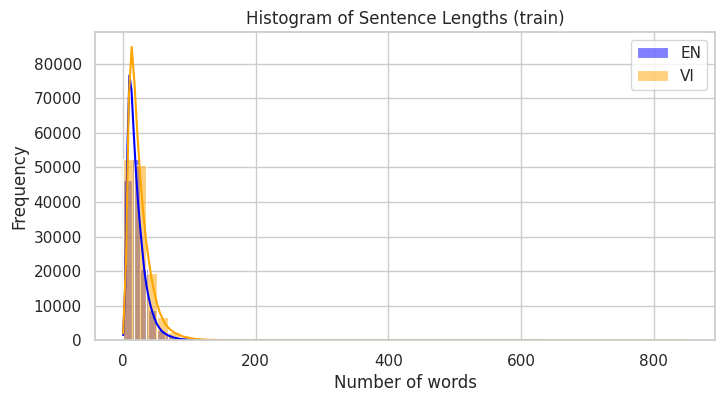

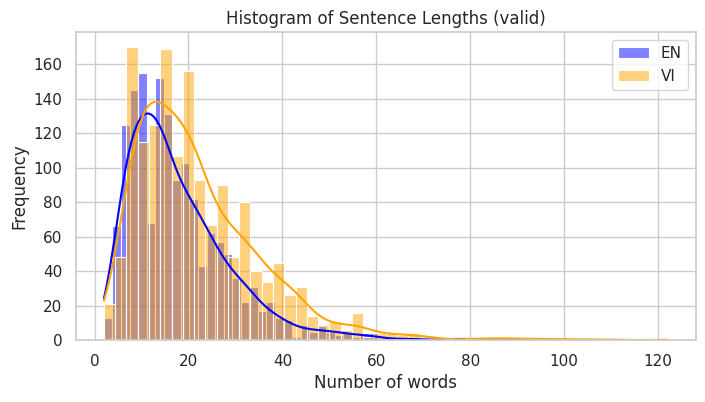

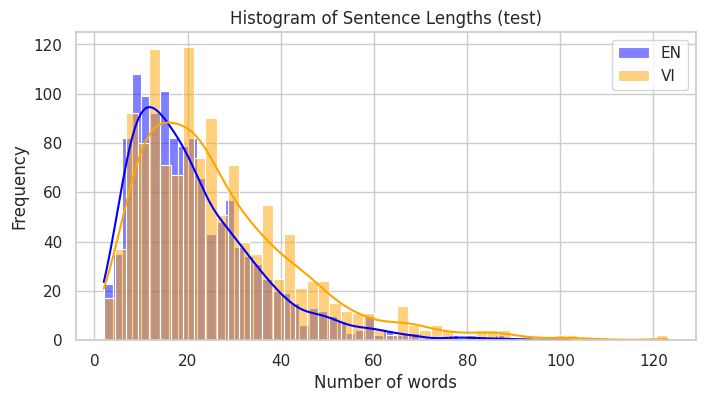

In [7]:
len_stats(train_en, train_vi, 'train')
len_stats(valid_en, valid_vi, 'valid')
len_stats(test_en, test_vi, "test")

# Data Vocab

In [8]:
def top_words(sentences, top_k=20):
    words = " ".join(sentences).split()
    counter = Counter(words)
    return counter.most_common(top_k)

top_en = top_words(train_en)
top_vi = top_words(train_vi)

print("Top EN words:", top_en)
print("Top VI words:", top_vi)

Top EN words: [(',', 156165), ('.', 132507), ('the', 103057), ('to', 65621), ('of', 60267), ('and', 56338), ('a', 54125), ('that', 46611), ('I', 43602), ('in', 38563), ('is', 33467), ('you', 33030), ('it', 30652), ('&apos;s', 29554), ('we', 28447), ('And', 23335), ('this', 21398), ('&quot;', 18909), ('was', 15981), ('for', 15410)]
Top VI words: [(',', 128630), ('.', 119723), ('là', 58028), ('tôi', 52015), ('một', 48967), ('có', 48312), ('và', 48018), ('những', 37970), ('chúng', 37376), ('của', 37085), ('không', 30785), ('ta', 30137), ('người', 26785), ('đó', 26716), ('bạn', 26682), ('trong', 24819), ('thể', 24363), ('này', 23092), ('đã', 22995), ('các', 22510)]


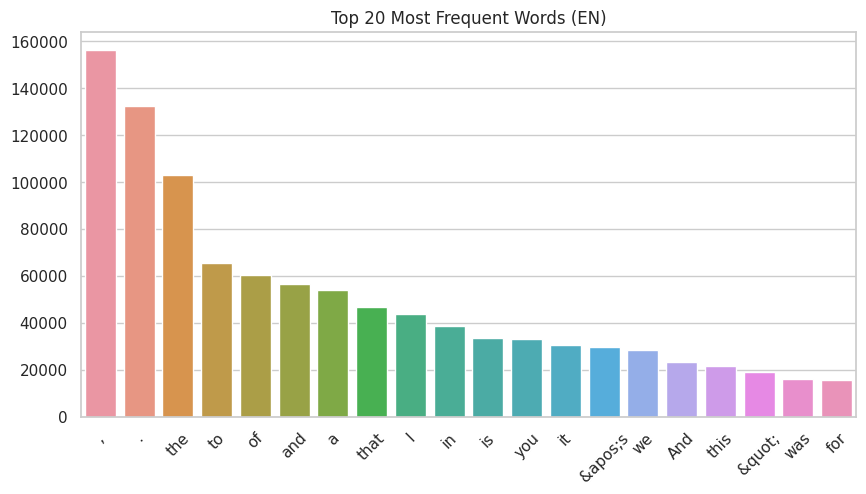

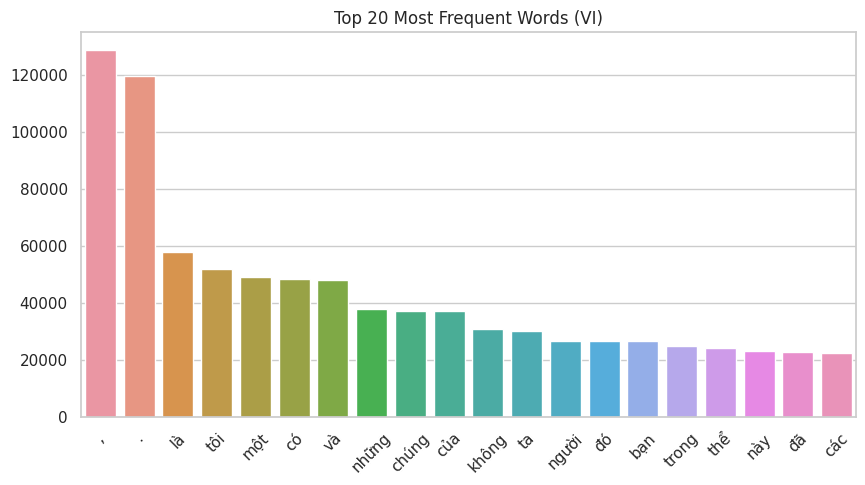

In [9]:
words, counts = zip(*top_en)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words (EN)")
plt.show()

words, counts = zip(*top_vi)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words (VI)")
plt.show()

In [10]:
def vocab_stats():
    def build_vocab(data):
        words = " ".join(data).split()
        vocab = set(words)
        counter = Counter(words)
        return vocab, counter
    
    # Train
    train_vocab_en, train_counter_en = build_vocab(train_en)
    train_vocab_vi, train_counter_vi = build_vocab(train_vi)
    
    # Validation
    valid_vocab_en, valid_counter_en = build_vocab(valid_en)
    valid_vocab_vi, valid_counter_vi = build_vocab(valid_vi)
    
    # Test
    test_vocab_en, test_counter_en = build_vocab(test_en)
    test_vocab_vi, test_counter_vi = build_vocab(test_vi)
    
    print("=== Vocabulary Size ===")
    print(f"Train EN: {len(train_vocab_en):,} words")
    print(f"Train VI: {len(train_vocab_vi):,} words")
    print(f"Valid EN: {len(valid_vocab_en):,} words")
    print(f"Valid VI: {len(valid_vocab_vi):,} words")
    print(f"Test EN:  {len(test_vocab_en):,} words")
    print(f"Test VI:  {len(test_vocab_vi):,} words")

vocab_stats()

=== Vocabulary Size ===
Train EN: 54,169 words
Train VI: 25,615 words
Valid EN: 3,727 words
Valid VI: 2,487 words
Test EN:  3,917 words
Test VI:  2,660 words


In [11]:
def analyze_vocab(data, lang, top_n=20):
    # Tokenize
    all_tokens = []
    for sent in data:
        all_tokens.extend(sent.split())
    
    vocab = set(all_tokens)
    freq = Counter(all_tokens)
    
    print(f"\n{lang}:")
    print(f"  Total tokens: {len(all_tokens):,}")
    print(f"  Vocabulary size: {len(vocab):,}")
    print(f"  Type-Token Ratio: {len(vocab)/len(all_tokens):.4f}")
    
    # Rare words
    rare = sum(1 for w, c in freq.items() if c == 1)
    print(f"  Hapax legomena (freq=1): {rare:,} ({100*rare/len(vocab):.2f}%)")
    
    very_rare = sum(1 for w, c in freq.items() if c <= 3)
    print(f"  Very rare (freq≤3): {very_rare:,} ({100*very_rare/len(vocab):.2f}%)")
    
    # Top words
    print(f"\n  Top {top_n} words:")
    for word, count in freq.most_common(top_n):
        print(f"    {word:20s} : {count:7,} ({100*count/len(all_tokens):.2f}%)")

analyze_vocab(train_en, "Eng")
analyze_vocab(train_vi, "Vie")


Eng:
  Total tokens: 2,706,255
  Vocabulary size: 54,169
  Type-Token Ratio: 0.0200
  Hapax legomena (freq=1): 21,912 (40.45%)
  Very rare (freq≤3): 34,179 (63.10%)

  Top 20 words:
    ,                    : 156,165 (5.77%)
    .                    : 132,507 (4.90%)
    the                  : 103,057 (3.81%)
    to                   :  65,621 (2.42%)
    of                   :  60,267 (2.23%)
    and                  :  56,338 (2.08%)
    a                    :  54,125 (2.00%)
    that                 :  46,611 (1.72%)
    I                    :  43,602 (1.61%)
    in                   :  38,563 (1.42%)
    is                   :  33,467 (1.24%)
    you                  :  33,030 (1.22%)
    it                   :  30,652 (1.13%)
    &apos;s              :  29,554 (1.09%)
    we                   :  28,447 (1.05%)
    And                  :  23,335 (0.86%)
    this                 :  21,398 (0.79%)
    &quot;               :  18,909 (0.70%)
    was                  :  15,981 (0.59%)


# Processing

In [12]:
import re
import html
import unicodedata
import string
from typing import List, Tuple

'''
1. Decode HTML
   Examples:
       &apos; -> '
       &quot; -> "
       &amp;  -> &
       &lt;   -> <
       &gt;   -> >

2. Chuẩn hóa whitespace
    - Remove leading/trailing spaces
    - Replace multiple spaces with single space
    - Replace tabs, newlines with space
    - Remove non-breaking spaces
    
3. Lowering text
'''
def cleaning(text):
    text = html.unescape(text)
    text = re.sub(r"<[^>]+>", "", text) # Remove html tags
    # text = re.sub(r"[^\w\s]", "", text) # Remove not num/alphabet
    text = re.sub(r"\s+", " ", text) # Space norm
    text = text.lower()

    return text

# Cleaning and filter by length, max len = 70
def clean_data(data_en, data_vi, max_len=70):
    """
    Clean và filter đơn giản bằng pandas
    """
    # Tạo DataFrame
    df = pd.DataFrame({
        'en': data_en,
        'vi': data_vi
    })
    
    print(f"Original: {len(df)} pairs")
    
    # Clean text
    df['en'] = df['en'].apply(cleaning)
    df['vi'] = df['vi'].apply(cleaning)
    
    
    # Calculate lengths
    df['en_len'] = df['en'].apply(lambda x: len(x.split()))
    df['vi_len'] = df['vi'].apply(lambda x: len(x.split()))
    
    # Filter by max length
    df = df[(df['en_len'] <= max_len) & (df['vi_len'] <= max_len)]
    print(f"After filtering by length (≤{max_len}): {len(df)} pairs")
    
    # Remove NaN và empty
    df = df.dropna()
    df = df[df['en'].str.strip() != '']
    df = df[df['vi'].str.strip() != '']
    print(f"After removing empty: {len(df)} pairs")
    
    
    # Convert back to lists
    en_clean = df['en'].tolist()
    vi_clean = df['vi'].tolist()
    
    return en_clean, vi_clean

In [13]:
# text = "My n  ame... Is \this not   &quot\tMinh\n&apos;"
text = 'Hello, <b> world! </b> This&apos;s is a test: remove     punctuation...'
print(cleaning(text))

hello, world! this's is a test: remove punctuation...


In [14]:
train_en, train_vi = clean_data(train_en, train_vi)
valid_en, valid_vi = clean_data(valid_en, valid_vi)
test_en, test_vi = clean_data(test_en, test_vi)


# vocab_stats()
print("="*7)
print("Train len:", len(train_en), len(train_vi))
print("Valid len:", len(valid_en), len(valid_vi))
print("Test len:", len(test_en), len(test_vi))

Original: 133317 pairs
After filtering by length (≤70): 129706 pairs
After removing empty: 129555 pairs
Original: 1553 pairs
After filtering by length (≤70): 1539 pairs
After removing empty: 1539 pairs
Original: 1268 pairs
After filtering by length (≤70): 1233 pairs
After removing empty: 1233 pairs
Train len: 129555 129555
Valid len: 1539 1539
Test len: 1233 1233


In [15]:
for i in range(3):
    print(f'Source: {train_en[i]}\nTarget: {train_vi[i]}\n\n')

Source: rachel pike : the science behind a climate headline
Target: khoa học đằng sau một tiêu đề về khí hậu


Source: i 'd like to talk to you today about the scale of the scientific effort that goes into making the headlines you see in the paper .
Target: tôi muốn cho các bạn biết về sự to lớn của những nỗ lực khoa học đã góp phần làm nên các dòng tít bạn thường thấy trên báo .


Source: headlines that look like this when they have to do with climate change , and headlines that look like this when they have to do with air quality or smog .
Target: có những dòng trông như thế này khi bàn về biến đổi khí hậu , và như thế này khi nói về chất lượng không khí hay khói bụi .




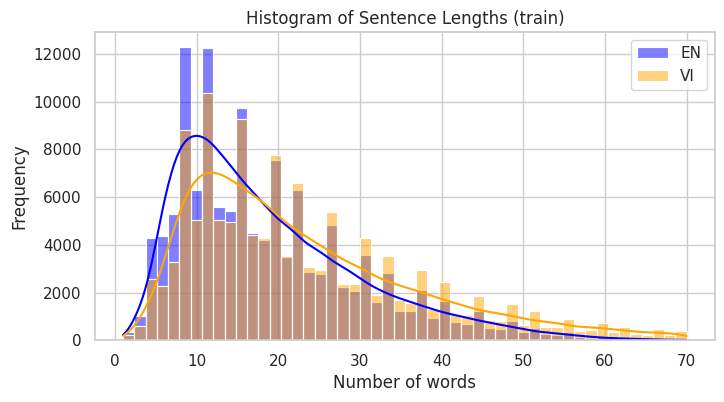

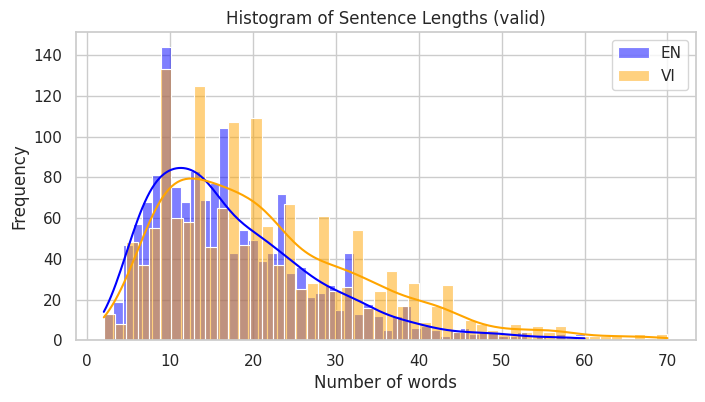

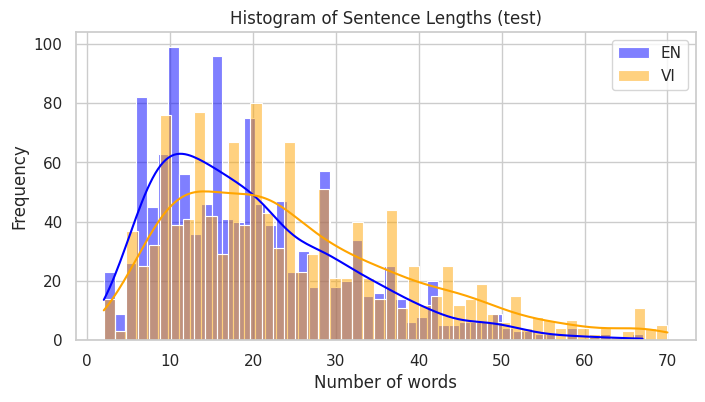

In [16]:
len_stats(train_en, train_vi, 'train')
len_stats(valid_en, valid_vi, 'valid')
len_stats(test_en, test_vi, "test")

# Vocab

In [17]:
from collections import Counter

def build_vocab(tokenized_sentences, min_freq=1):
    word_counts = Counter()
    for tokens in tokenized_sentences:
        word_counts.update(tokens)
    
    # Tạo vocab: word → index
    vocab = {
        '<pad>': 0,
        '<unk>': 1,
        '<sos>': 2,
        '<eos>': 3,
    }
    
    idx = 4
    for word, count in word_counts.items():
        if count >= min_freq:  # Chỉ giữ từ xuất hiện >= min_freq
            vocab[word] = idx
            idx += 1
    
    return vocab

## Tokenize

In [18]:
from nltk import wordpunct_tokenize

train_en_tokenized = [wordpunct_tokenize(sent) for sent in train_en]
train_vi_tokenized = [wordpunct_tokenize(sent) for sent in train_vi]

In [19]:
sent = "text: 'Hello, world! This is a test: remove punctuation...'"
print(wordpunct_tokenize(sent))

['text', ':', "'", 'Hello', ',', 'world', '!', 'This', 'is', 'a', 'test', ':', 'remove', 'punctuation', "...'"]


In [20]:
en_vocab = build_vocab(train_en_tokenized)
vi_vocab = build_vocab(train_vi_tokenized)
print("Source vocab size:", len(en_vocab))
print("Source vocab size:", len(vi_vocab))

Source vocab size: 40480
Source vocab size: 18973


In [21]:
def tokens_to_ids(tokens_list, vocab):
    """Convert tokens to indices"""
    ids_list = []
    for tokens in tokens_list:
        ids = [vocab.get(token, vocab['<unk>']) for token in tokens]
        # Add <sos> and <eos>
        ids = [vocab['<sos>']] + ids + [vocab['<eos>']]
        ids_list.append(ids)
    return ids_list

tokens_list = [
    ['i', 'am', 'tired'],
    ['leon', 'need', 'to', 'sleep']
]
print(tokens_to_ids(tokens_list, en_vocab))

[[2, 13, 381, 11245, 3], [2, 31084, 427, 17, 2583, 3]]


# Padding and save

In [22]:
train_en_ids = tokens_to_ids(train_en_tokenized, en_vocab)
train_vi_ids = tokens_to_ids(train_vi_tokenized, vi_vocab)

# Padding maxlen =  max(len(sent))
en_max_token_len = max([len(tokens) for tokens in train_en_ids])
vi_max_token_len = max([len(tokens) for tokens in train_vi_ids])

print("Max eng len:", en_max_token_len)
print("Max vie len", vi_max_token_len)
maxlen = max(en_max_token_len, vi_max_token_len)
for i in range(len(train_en_ids)):
    train_en_ids[i] = train_en_ids[i] + [0] * maxlen
    train_en_ids[i] = train_en_ids[i][:maxlen]

for i in range(len(train_vi_ids)):
    train_vi_ids[i] = train_vi_ids[i] + [0] * maxlen
    train_vi_ids[i] = train_vi_ids[i][:maxlen]

print(train_en_ids[0])
print(train_vi_ids[0])

Max eng len: 79
Max vie len 88
[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
# Tương tự với test và validate
# Tokensize:
valid_en_tokenized = [wordpunct_tokenize(sent) for sent in valid_en]
valid_vi_tokenized = [wordpunct_tokenize(sent) for sent in valid_vi]

test_en_tokenized = [wordpunct_tokenize(sent) for sent in test_en]
test_vi_tokenized = [wordpunct_tokenize(sent) for sent in test_vi]

# to indices with en_vocab and vi_vocab:
valid_en_ids = tokens_to_ids(valid_en_tokenized, en_vocab)
valid_vi_ids = tokens_to_ids(valid_vi_tokenized, vi_vocab)

test_en_ids = tokens_to_ids(test_en_tokenized, en_vocab)
test_vi_ids = tokens_to_ids(test_vi_tokenized, vi_vocab)

# Padding
print("Maxlen for padding:", maxlen)
for i in range(len(valid_en_ids)):
    valid_en_ids[i] = valid_en_ids[i] + [0] * maxlen
    valid_en_ids[i] = valid_en_ids[i][:maxlen]
for i in range(len(valid_vi_ids)):
    valid_vi_ids[i] = valid_vi_ids[i] + [0] * maxlen
    valid_vi_ids[i] = valid_vi_ids[i][:maxlen]

for i in range(len(test_en_ids)):
    test_en_ids[i] = test_en_ids[i] + [0] * maxlen
    test_en_ids[i] = test_en_ids[i][:maxlen]
for i in range(len(test_vi_ids)):
    test_vi_ids[i] = test_vi_ids[i] + [0] * maxlen
    test_vi_ids[i] = test_vi_ids[i][:maxlen]

Maxlen for padding: 88


# Save processed data

In [24]:
import pickle

# ============================================
# LƯU DỮ LIỆU ĐÃ XỬ LÝ
# ============================================

def save_processed_data(train_en_ids, train_vi_ids,
                       valid_en_ids, valid_vi_ids,
                       test_en_ids, test_vi_ids,
                       en_vocab, vi_vocab,
                       save_path='processed_data'):
    
    # Kiểm tra độ dài
    print("="*60)
    print("DATA SUMMARY BEFORE SAVING")
    print("="*60)
    print(f"Train: EN={len(train_en_ids):,} | VI={len(train_vi_ids):,}")
    print(f"Valid: EN={len(valid_en_ids):,} | VI={len(valid_vi_ids):,}")
    print(f"Test:  EN={len(test_en_ids):,} | VI={len(test_vi_ids):,}")
    print(f"\nVocab: EN={len(en_vocab):,} | VI={len(vi_vocab):,}")
    
    # Lưu với numpy (compressed)
    print(f"\n💾 Saving to train_{save_path}.npz...")
    np.savez_compressed(
        f'train_{save_path}.npz',
        # Training data
        train_en_ids=train_en_ids,
        train_vi_ids=train_vi_ids,
    )
    print(f"\n💾 Saving to valid_{save_path}.npz...")
    np.savez_compressed(
        f'valid_{save_path}.npz',
        # Validation data
        valid_en_ids=valid_en_ids,
        valid_vi_ids=valid_vi_ids,
    )
    print(f"\n💾 Saving to test_{save_path}.npz...")
    np.savez_compressed(
        f'test_{save_path}.npz',
        # Test data
        test_en_ids=test_en_ids,
        test_vi_ids=test_vi_ids,
    )
    
    # Lưu vocab riêng (dùng pickle vì dict)
    print(f"💾 Saving vocabularies to {save_path}_vocab.pkl...")
    vocab_data = {
        'en_vocab': en_vocab,
        'vi_vocab': vi_vocab,
        # Lưu thêm reverse vocab để decode
        'en_idx2word': {idx: word for word, idx in en_vocab.items()},
        'vi_idx2word': {idx: word for word, idx in vi_vocab.items()},
    }
    
    with open(f'{save_path}_vocab.pkl', 'wb') as f:
        pickle.dump(vocab_data, f)
    
    print("\n✅ Saved successfully!")
    print(f"   - ..{save_path}.npz (data)")
    print(f"   - {save_path}_vocab.pkl (vocabularies)")


# Save
save_processed_data(
    train_en_ids, train_vi_ids,
    valid_en_ids, valid_vi_ids,
    test_en_ids, test_vi_ids,
    en_vocab, vi_vocab,
    save_path='iwslt_envi_processed'
)

DATA SUMMARY BEFORE SAVING
Train: EN=129,555 | VI=129,555
Valid: EN=1,539 | VI=1,539
Test:  EN=1,233 | VI=1,233

Vocab: EN=40,480 | VI=18,973

💾 Saving to train_iwslt_envi_processed.npz...

💾 Saving to valid_iwslt_envi_processed.npz...

💾 Saving to test_iwslt_envi_processed.npz...
💾 Saving vocabularies to iwslt_envi_processed_vocab.pkl...

✅ Saved successfully!
   - ..iwslt_envi_processed.npz (data)
   - iwslt_envi_processed_vocab.pkl (vocabularies)


In [25]:
def load_processed_data(save_path='processed_data'):
    """
    Load toàn bộ data đã lưu
    
    Returns:
        tuple: (train_en, train_vi, valid_en, valid_vi, test_en, test_vi, 
                en_vocab, vi_vocab, en_idx2word, vi_idx2word)
    """
    print("LOADING PROCESSED DATA")
    print("="*60)
    
    # Load numpy data
    print(f"Loading from ..{save_path}.npz...")
    train_data = np.load(f'train_{save_path}.npz', allow_pickle=True)
    valid_data = np.load(f'valid_{save_path}.npz', allow_pickle=True)
    test_data = np.load(f'test_{save_path}.npz', allow_pickle=True)
    
    train_en_ids = train_data['train_en_ids'].tolist()
    train_vi_ids = train_data['train_vi_ids'].tolist()
    valid_en_ids = valid_data['valid_en_ids'].tolist()
    valid_vi_ids = valid_data['valid_vi_ids'].tolist()
    test_en_ids = test_data['test_en_ids'].tolist()
    test_vi_ids = test_data['test_vi_ids'].tolist()
    
    # Load vocab
    print(f"Loading vocabularies from {save_path}_vocab.pkl...")
    with open(f'{save_path}_vocab.pkl', 'rb') as f:
        vocab_data = pickle.load(f)
    
    en_vocab = vocab_data['en_vocab']
    vi_vocab = vocab_data['vi_vocab']
    en_idx2word = vocab_data['en_idx2word']
    vi_idx2word = vocab_data['vi_idx2word']
    
    # Print summary
    print("\nLoaded successfully!")
    print("="*10)
    print(f"Train: EN={len(train_en_ids):,} | VI={len(train_vi_ids):,}")
    print(f"Valid: EN={len(valid_en_ids):,} | VI={len(valid_vi_ids):,}")
    print(f"Test:  EN={len(test_en_ids):,} | VI={len(test_vi_ids):,}")
    print(f"\nVocab: EN={len(en_vocab):,} | VI={len(vi_vocab):,}")
    
    # Sample check
    print("\n📝 Sample check (first sequence):")
    print(f"Train EN IDs (first 20): {train_en_ids[0][:20]}")
    print(f"Train VI IDs (first 20): {train_vi_ids[0][:20]}")
    
    return (train_en_ids, train_vi_ids, 
            valid_en_ids, valid_vi_ids, 
            test_en_ids, test_vi_ids,
            en_vocab, vi_vocab, 
            en_idx2word, vi_idx2word)

In [26]:
train_en_ids, train_vi_ids, valid_en_ids, valid_vi_ids, test_en_ids, test_vi_ids, en_vocab, vi_vocab, en_idx2word, vi_idx2word = load_processed_data("iwslt_envi_processed")

LOADING PROCESSED DATA
Loading from ..iwslt_envi_processed.npz...
Loading vocabularies from iwslt_envi_processed_vocab.pkl...

Loaded successfully!
Train: EN=129,555 | VI=129,555
Valid: EN=1,539 | VI=1,539
Test:  EN=1,233 | VI=1,233

Vocab: EN=40,480 | VI=18,973

📝 Sample check (first sequence):
Train EN IDs (first 20): [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Train VI IDs (first 20): [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 3, 0, 0, 0, 0, 0, 0, 0, 0]
